In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/carsdataset.csv',index_col=0)
df.head()

,Transmission,Drive,Drive Type,Engine Size,Engine Cylinders,City MPG,Highway MPG,Fuel,Super,Class
0,Automatic,2 wheel,Front,1.4,4.0,29.0,40.0,Gas,Turbo,Sedan
1,Automatic,2 wheel,Rear,4.4,8.0,17.0,24.0,Gas,Turbo,Convertible
2,Automatic,2 wheel,Rear,3.0,6.0,20.0,25.0,Diesel,Turbo,Truck
3,Automatic,2 wheel,Rear,2.0,4.0,23.0,32.0,Gas,Turbo,Convertible
4,Automatic,All wheel,-1,2.0,4.0,23.0,31.0,Gas,Turbo,Convertible


In [ ]:
df.shape

(1124, 10)

In [ ]:
for x in df.columns:
  print(df[x].unique())

['Automatic' 'Manual']
['2 wheel' 'All wheel' '4 wheel']
['Front' 'Rear' '-1']
[ 1.4  4.4  3.   2.   3.6  3.5  4.7  1.6  6.   1.5  6.6  5.3  5.7  2.4
  2.5  2.3  1.8  3.8  6.4  6.7  5.4  2.7  6.2  3.4  5.   5.6  4.   3.3
 -1.   3.7  8.   4.6  4.3  1.3  5.5  6.3  2.9  4.5  5.2  1.   3.9  6.5
  3.2  2.8  7.   2.6]
[ 4.  8.  6.  5. 10.  3. -1. 12.]
[29. 17. 20. 23. 19. 31. 18. 21. 13. 33. -1. 16. 22. 28. 26. 30. 24. 27.
 15. 32. 25. 14. 10.  9. 53. 12. 36. 11. 41. 43. 51. 47.]
[40. 24. 25. 32. 31. 23. 28. 27. 17. 26. 41. -1. 34. 22. 30. 33. 18. 37.
 38. 39. 36. 35. 29. 21. 20. 15. 19. 16. 42. 52. 44. 45. 46.]
['Gas' 'Diesel' 'Flexible']
['Turbo' 'None' 'Super']
['Sedan' 'Convertible' 'Truck' 'Van' 'Suv-crossover']


## EDA

In [ ]:
# Missing values
(df=='-1').sum() + (df==-1).sum()

Transmission          0
Drive                 0
Drive Type          403
Engine Size           4
Engine Cylinders      4
City MPG             90
Highway MPG          90
Fuel                  0
Super                 0
Class                 0
dtype: int64

Text(0.5, 1.0, 'Histogram of Drive Type')

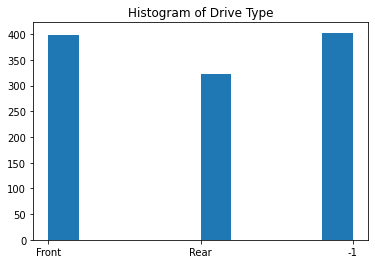

In [ ]:
# plotting a histogram of 'Drive Type' 
plt.hist(df['Drive Type'])
plt.title('Histogram of Drive Type')

In [ ]:
# Replacing all of the missing values in 'Drive Type' with 'Unknown'
df.loc[df['Drive Type'] == '-1', 'Drive Type'] = "Unknown"

Text(0.5, 1.0, 'Missing values of Drive Type in each Class')

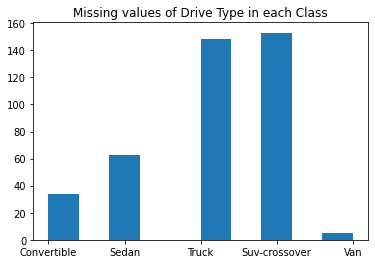

In [ ]:
# Plotting a graph 
plt.hist(df.loc[df['Drive Type'] == 'Unknown','Class'])
plt.title('Missing values of Drive Type in each Class')

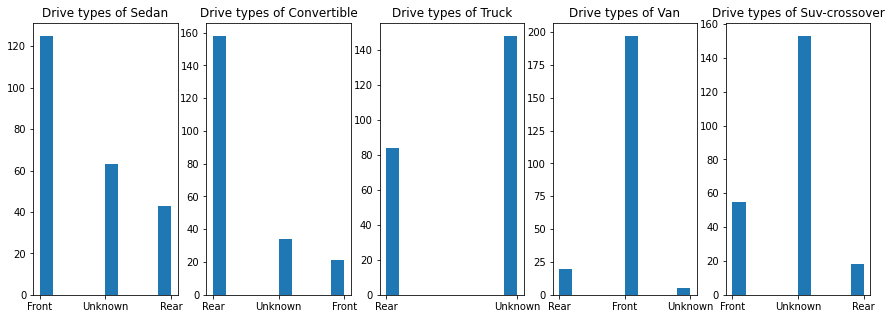

In [ ]:
fig=plt.figure(figsize=(15,5))
columns = 5
rows = 1
vehicle_type = ['Sedan', 'Convertible', 'Truck', 'Van', 'Suv-crossover']
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    plt.hist(df.loc[df['Class'] == vehicle_type[i-1], 'Drive Type'])
    plt.title('Drive types of '+vehicle_type[i-1])
plt.show()

In [ ]:
# Truck are rear wheel drive so changing the missing 'Drive Type' values to 'Rear' for 'Trucks'
df.loc[(df['Class'] == 'Truck') & (df['Drive Type'] == 'Unknown'), 'Drive Type'] = 'Rear'

In [ ]:
# Checking if the missing values for City MPG and Highway MPG are the same
df[df['City MPG'] == -1].equals(df[df['Highway MPG'] == -1])

True

In [ ]:
# Checking if the missing values for Engine Size and Engine Cylinders are the same
df[df['Engine Size'] == -1].equals(df[df['Engine Cylinders'] == -1])

True

In [ ]:
# Highway MPG and City MPG
missing_classes = df[df['Highway MPG'] == -1].groupby('Class').mean()['Highway MPG'].index.tolist()

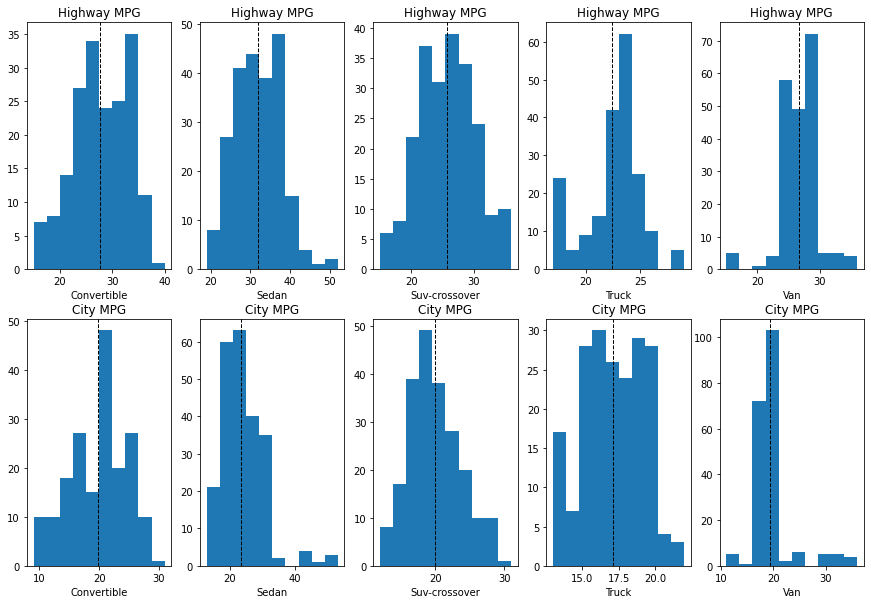

In [ ]:
_, ax =plt.subplots(2,5, figsize=(15,10))
for i1,x in enumerate(['Highway MPG', 'City MPG']):
  for i2,y in enumerate(missing_classes):
    temp = df[(df['Class'] == y) & (df[x] != -1)][x]
    ax[i1][i2].hist(temp)
    ax[i1][i2].axvline(temp.mean(), color='k', linestyle='dashed', linewidth=1)
    ax[i1][i2].set_title(x)
    ax[i1][i2].set_xlabel(y)

In [ ]:
# Calculating mean of each 'Class' for 'Engine Size' and 'Engine Cylinders'
mean = {}
mean['City MPG']= df[df['City MPG'] != -1].groupby('Class').mean()['City MPG']
mean['Highway MPG']= df[df['Highway MPG'] != -1].groupby('Class').mean()['Highway MPG']

In [ ]:
# Filling missing values of 'Highway MPG' and 'City MPG'
for i1,x in enumerate(['Highway MPG', 'City MPG']):
  for i2,y in enumerate(missing_classes):
    df.loc[(df['Class'] == y) & (df[x] == -1), x] = mean[x][y]

In [ ]:
# Highway MPG and City MPG
missing_classes2 = df[df['Engine Size'] == -1].groupby('Class').mean()['Engine Size'].index.tolist()

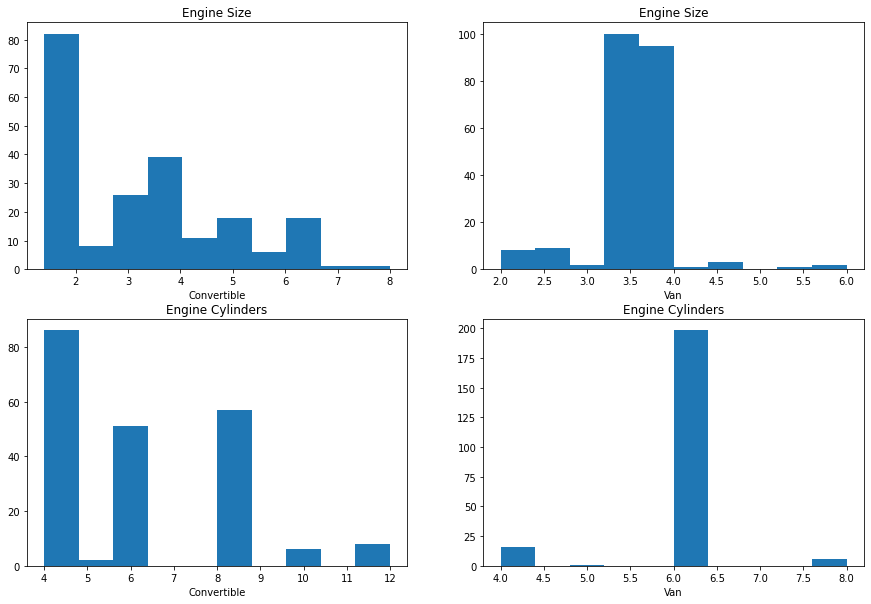

In [ ]:
_, ax =plt.subplots(2,2, figsize=(15,10))
for i1,x in enumerate(['Engine Size', 'Engine Cylinders']):
  for i2,y in enumerate(missing_classes2):
    temp = df[(df['Class'] == y) & (df[x] != -1)][x]
    ax[i1][i2].hist(temp)
    ax[i1][i2].set_title(x)
    ax[i1][i2].set_xlabel(y)

In [ ]:
# Calculating mode of each 'Class' for 'Engine Size' and 'Engine Cylinders'
modes = {}
modes['Engine Size']= df[df['Engine Size'] != -1].groupby('Class').agg(lambda x:x.value_counts().index[0])['Engine Size']
modes['Engine Cylinders']= df[df['Engine Cylinders'] != -1].groupby('Class').agg(lambda x:x.value_counts().index[0])['Engine Cylinders']

In [ ]:
# Filling missing values of 'Engine Size' and 'Engine Cylinders' with their 'Class' mode
for i1,x in enumerate(['Engine Size', 'Engine Cylinders']):
  for i2,y in enumerate(missing_classes2):
    df.loc[(df['Class'] == y) & (df[x] == -1), x] = modes[x][y]

In [ ]:
# Checking missing values
(df=='-1').sum() + (df==-1).sum()

Transmission        0
Drive               0
Drive Type          0
Engine Size         0
Engine Cylinders    0
City MPG            0
Highway MPG         0
Fuel                0
Super               0
Class               0
dtype: int64

In [ ]:
# Storing features
features = df[['Transmission', 'Drive Type', 'Drive', 'Engine Size', 'Engine Cylinders', 'City MPG',
       'Highway MPG', 'Fuel', 'Super']]
       
# Applying one hot encoding
features = pd.get_dummies(features,drop_first=True)

In [ ]:
# Encoding the 'Class' column and storing it in labels
labels = df['Class'].astype('category').cat.codes

## Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(features,labels,random_state = 0)

#### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
  
model = DecisionTreeClassifier(random_state = 0)
  
model.fit(features, labels)

DecisionTreeClassifier(random_state=0)

In [ ]:
print('Accuracy of the classifier on training set: {:.2f}%'
     .format(model.score(X_train, y_train)*100))

Accuracy of the classifier on training set: 96.44%


In [ ]:
print('Accuracy of the classifier on test set: {:.2f}%'
     .format(model.score(X_test, y_test)*100))

Accuracy of the classifier on test set: 97.15%
